# 4.10 Part 3 - Customer profiling

### This script contains the following points:

#### 1. Import libraries
#### 2. Import data
#### 3. Create customer profiles
#### 4. Distribution of customer profiles
#### 5. Descriptive stats of customer profiles
#### 6. Customer profile insights by region
#### 7. Customer profile insights by product range
#### 8.  Customer profile insights by spending type

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [2]:
# project folder path

path = r'C:\Users\Odette\Desktop\CareerFoundry\Immersion Courses\Course 4\Instacart Basket Analysis'

In [3]:
# import of orders_products data

final_df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'Instacart_final2.pkl'))

In [4]:
final_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_range,income_bracket,parental_status
0,2539329,1,1,2,8,0,196,1,False,Soda,...,2019-02-17,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent
1,2398795,1,2,3,7,15,196,1,True,Soda,...,2019-02-17,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent
2,473747,1,3,3,12,21,196,1,True,Soda,...,2019-02-17,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent
3,2254736,1,4,4,7,29,196,1,True,Soda,...,2019-02-17,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent
4,431534,1,5,4,15,28,196,1,True,Soda,...,2019-02-17,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent


# Create customer profiles

In [5]:
# create flag for 'High earner' (age: 40-59, income: 400000+, department_id: 1, 4, 7, 19, 16, parental_status: Parent)

final_df.loc[(final_df['age_range'].isin(['40-49', '50-59'])) & (final_df['income'] >= 400000) & (final_df['department_id'].isin([1, 4, 7, 19, 16])) & (final_df['parental_status'] == 'Parent'), 'customer_profile'] = 'Higher earner'

In [6]:
# create flag for 'Young single adult' (age: <39, income: <=199999, department_id: 1, 4, 7, 19, parental_status: Non-parent)

final_df.loc[(final_df['age'] <= 39) & (final_df['income'] <= 199999) & (final_df['department_id'].isin([1, 4, 7, 19])) & (final_df['parental_status'] == 'Non-parent'), 'customer_profile'] = 'Young single adult'

In [7]:
# create flag for 'Young parent' (age: 20-39, income: <=199999, department_id: 4, 13, 16, 17, 18 parental_status: Parent)

final_df.loc[(final_df['age_range'].isin(['20-29', '30-39'])) & (final_df['income'] <= 199999) & (final_df['department_id'].isin([4, 13, 16, 17, 18])) & (final_df['parental_status'] == 'Parent'), 'customer_profile'] = 'Young parent'

In [8]:
# create flag for 'Over 60' (age: 60+, income: <=199999, department_id: 1, 4, 11, 12, 15, 20 parental_status: Parent)

final_df.loc[(final_df['age'] >= 60) & (final_df['income'] <= 199999) & (final_df['department_id'].isin([1, 4, 11, 12, 15, 20])) & (final_df['parental_status'] == 'Parent'), 'customer_profile'] = 'Over 60'

In [9]:
final_df['customer_profile'].value_counts(dropna = False)

NaN                   21889602
Young parent           4009469
Over 60                3640234
Young single adult     1414749
Higher earner            10510
Name: customer_profile, dtype: int64

In [10]:
pd.options.display.max_rows = None

In [11]:
final_df[['user_id', 'customer_profile']].head(15)

,user_id,customer_profile
0,1,NaN
1,1,NaN
2,1,NaN
3,1,NaN
4,1,NaN
5,1,NaN
6,1,NaN
7,1,NaN
8,1,NaN
9,1,NaN


In [12]:
# transform all values in customer_profile column to be the same value for each user_id (a user_id cannot have 2 profiles)

final_df['customer_profile'] = final_df.groupby('user_id')['customer_profile'].transform('first')

In [13]:
final_df[['user_id', 'customer_profile']].head(15)

,user_id,customer_profile
0,1,Young parent
1,1,Young parent
2,1,Young parent
3,1,Young parent
4,1,Young parent
5,1,Young parent
6,1,Young parent
7,1,Young parent
8,1,Young parent
9,1,Young parent


In [14]:
# impute all empty cells with 'Other'

final_df['customer_profile'].fillna('Other', inplace=True)

In [15]:
final_df[['user_id', 'customer_profile']].head(60)

,user_id,customer_profile
0,1,Young parent
1,1,Young parent
2,1,Young parent
3,1,Young parent
4,1,Young parent
5,1,Young parent
6,1,Young parent
7,1,Young parent
8,1,Young parent
9,1,Young parent


In [16]:
final_df.shape

(30964564, 36)

In [17]:
# check total value counts

final_df['customer_profile'].value_counts(dropna=False)

Other                 13250552
Over 60                7824101
Young parent           7225574
Young single adult     2648192
Higher earner            16145
Name: customer_profile, dtype: int64

In [18]:
# check unique value counts at the customer level (how many unique customers fit into each profile?)

unique_profiles = final_df.groupby('customer_profile')['user_id'].nunique().sort_values(ascending=False)

In [19]:
unique_profiles

customer_profile
Other                 70064
Over 60               41075
Young parent          37418
Young single adult    14009
Higher earner            65
Name: user_id, dtype: int64

# Distribution of customer profiles

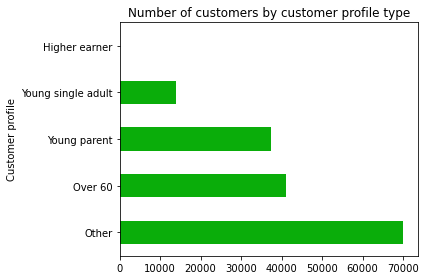

In [20]:
# bar chart based on distribution of customer profiles

profile_bar = unique_profiles.plot.barh(color =['#0AAD0A'], xlabel= 'Customer profile', ylabel= 'No. of customers', title = 'Number of customers by customer profile type')
plt.tight_layout()

In [21]:
# export chart in the form of an image file

profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profiles_distribution.png'))

# Descriptive stats of customer profiles

In [22]:
# find the mean, min & max of usage frequency, grouped by customer_profile

usage_freq_stats = final_df.groupby('customer_profile').agg({'days_since_last_order': ['mean', 'min', 'max']})

In [23]:
# result

usage_freq_stats

days_since_last_order        
                                    mean min max
customer_profile                                
Higher earner                   9.822670   0  30
Other                          10.226313   0  30
Over 60                        10.235056   0  30
Young parent                   10.206166   0  30
Young single adult             10.304715   0  30

In [24]:
# copy to clipboard

usage_freq_stats.to_clipboard()

In [25]:
# find the mean, min & max of the expenditure, grouped by customer_profile

prices_stats = final_df.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

In [26]:
# result

prices_stats

prices           
                        mean  min   max
customer_profile                       
Higher earner       7.765625  1.0  25.0
Other               7.792969  1.0  25.0
Over 60             7.796875  1.0  25.0
Young parent        7.785156  1.0  25.0
Young single adult  7.777344  1.0  25.0

In [27]:
# copy to clipboard

prices_stats.to_clipboard()

# Customer profile insights by region

In [28]:
# crosstab of customer_profile & region variables

xtab_profile_region = pd.crosstab(final_df['customer_profile'], final_df['region'], dropna = False)

In [29]:
xtab_profile_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Higher earner,5704,890,3598,5953
Other,3145804,2340489,4357344,3406915
Over 60,1809596,1389625,2609076,2015804
Young parent,1690357,1266438,2437986,1830793
Young single adult,610052,467243,903135,667762


In [30]:
xtab_profile_region.to_clipboard()

# Customer profile insights by product range

In [34]:
# crosstab of customer_profile & region variables

xtab_profile_range = pd.crosstab(final_df['customer_profile'], final_df['price_range_loc'], dropna = False)

In [35]:
xtab_profile_range

price_range_loc,High-range product,Low-range product,Mid-range product
customer_profile,,,
Higher earner,414,5058,10673
Other,171997,4140042,8938513
Over 60,100892,2441387,5281822
Young parent,91897,2257997,4875680
Young single adult,32753,830356,1785083


In [36]:
xtab_profile_range.to_clipboard()

# Customer profile insights by spending type

In [37]:
# crosstab of customer_profile & spending_type variables

xtab_profile_spender = pd.crosstab(final_df['customer_profile'], final_df['spending_type'], dropna = False)

In [38]:
xtab_profile_spender

spending_type,High spender,Low spender
customer_profile,,
Higher earner,16145,0
Other,364956,12885596
Over 60,70128,7753973
Young parent,119347,7106227
Young single adult,32795,2615397


In [39]:
xtab_profile_spender.to_clipboard()